In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
path = "processed_image.png"

In [3]:
num_classes = 2

In [4]:
def gas(mean, std, x):
    return 1 / (np.sqrt(2 * np.pi) * std + 1e-15) * np.exp(-0.5 * (x - mean)**2 / (std**2+1e-15))


In [5]:
def MRFSegmentation(path = "processed_image.png", num_classes = 2, beta = 0.5):
    img = np.array(plt.imread(path))
    imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imgGray = imgGray / 255
    imgCopy = imgGray.copy()
    imgpixel = (imgCopy.flatten()).reshape((-1, 1))
    kmeans = KMeans(n_clusters=num_classes, random_state=0)
    kmeans.fit(imgpixel)
    imgLabel = kmeans.labels_.reshape(imgCopy.shape)
    #imgLabel = np.random.randint(num_classes, size=imgCopy.shape)
    imgMrf = np.zeros_like(imgCopy)
    max_iter = 10
    c = 0
    sumList = [0] * num_classes
    numList = [0] * num_classes
    MeanList = [0] * num_classes
    stdSumList = [0] * num_classes
    stdList = [0] * num_classes
    for i in range(1, imgLabel.shape[0] - 1):
        for j in range(1, imgLabel.shape[1] - 1):
            x = imgLabel[i, j]
            sumList[x] += imgGray[i, j]
            numList[x] += 1
    for k in range(num_classes):
        MeanList[k] = sumList[k] / numList[k]
    for i in range(1, imgLabel.shape[0] - 1):
        for j in range(1, imgLabel.shape[1] - 1):
            x = imgLabel[i, j]
            stdSumList[x] += (imgGray[i, j] - MeanList[x]) ** 2
    for i in range(num_classes):
        stdList[i] = np.sqrt(stdSumList[i] / numList[i])
    for c in range(max_iter):
        for i in range(1, imgLabel.shape[0] - 1):
            for j in range(1, imgLabel.shape[1] - 1):
                uList = [0] * num_classes
                for k in range(num_classes):
                    template = np.ones((3, 3)) * k
                    template[1, 1] = np.inf
                    u = np.exp(- beta*2*np.sum((template == imgLabel[i - 1: i + 2, j - 1: j + 2])-0.5)) * gas(MeanList[k], stdList[k], imgGray[i, j])
                    uList[k] = u
                    sumList[k] += imgGray[i, j]
                    numList[k] += 1
                imgMrf[i, j] = uList.index(max(uList))
        for i in range(num_classes):
            MeanList[i] = sumList[i] / numList[i]
        for i in range(1, imgLabel.shape[0] - 1):
            for j in range(1, imgLabel.shape[1] - 1):
                x = int(imgLabel[i, j])
                #print(x, i, j)
                stdSumList[x] += (imgGray[i, j] - MeanList[x]) ** 2
        for i in range(num_classes):
            stdList[i] = np.sqrt(stdSumList[i] / numList[i])
        imgLabel = imgMrf.copy()
        print("第{}代结束".format(c), end="\r")
    plt.figure()
    plt.imshow(imgLabel)
    plt.title("n_classes = %d, beta = %f"%(num_classes, beta))
    plt.show()


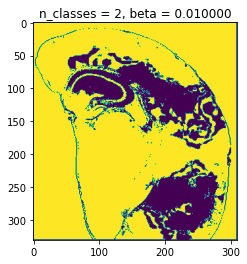

In [6]:
MRFSegmentation(path = "processed_image.png", num_classes = 2, beta=0.01)

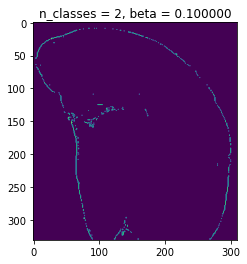

In [7]:
MRFSegmentation(path = "processed_image.png", num_classes = 2, beta=0.1)

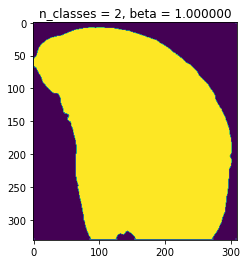

In [8]:
MRFSegmentation(path = "processed_image.png", num_classes = 2, beta=1)

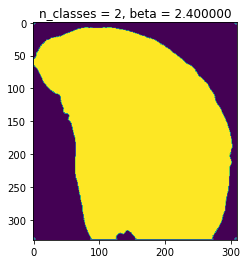

In [9]:
MRFSegmentation(path = "processed_image.png", num_classes = 2, beta=2.4)

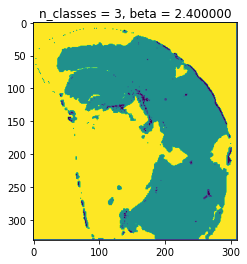

In [10]:
MRFSegmentation(path = "processed_image.png", num_classes = 3, beta=2.4)

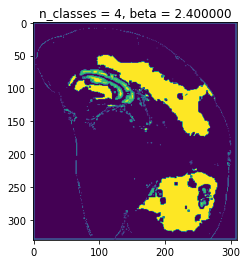

In [11]:
MRFSegmentation(path = "processed_image.png", num_classes = 4, beta=2.4)